# Seaborn Study

### Setup

In [5]:
# pip install seaborn
# conda install seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%reload_ext autoreload
%autoreload 2

### Import Data
##### Going to use seaborn's build-in datasets

In [11]:
# print(sns.get_dataset_names())
# We are useing "car_crashes" dataset
crash_df = sns.load_dataset("car_crashes")
crash_df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


## Distribution Plots

### Distribution Plot

## Best hint - use Shift+Tab to see information about the function

/Users/ernestbaghramyan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='not_distracted', ylabel='Density'>

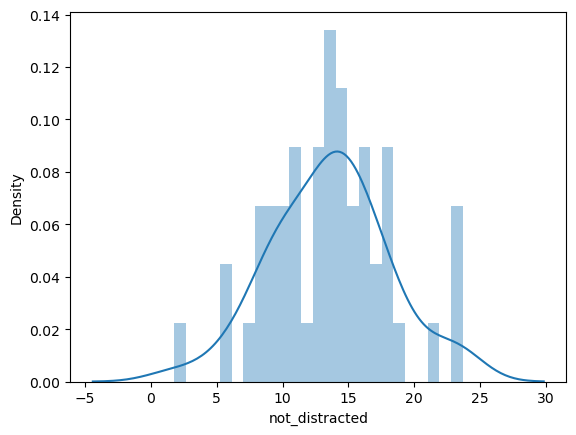

In [21]:
sns.distplot(crash_df["not_distracted"], bins = 25)

### Joint Plot

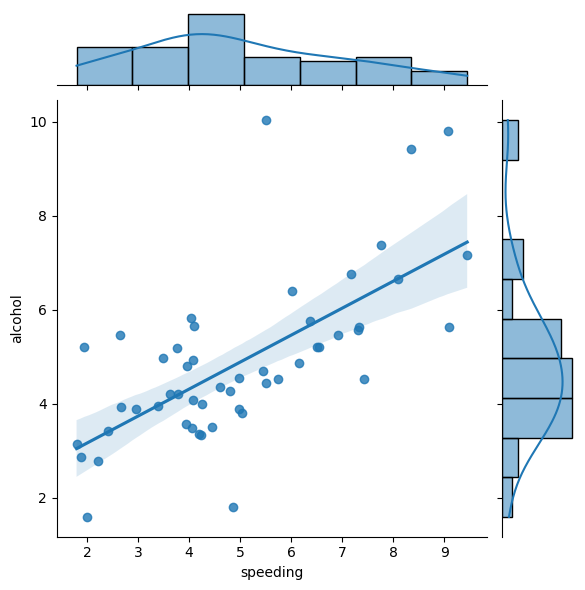

In [25]:
sns.jointplot(x = "speeding", y = "alcohol", data = crash_df, kind = "reg")

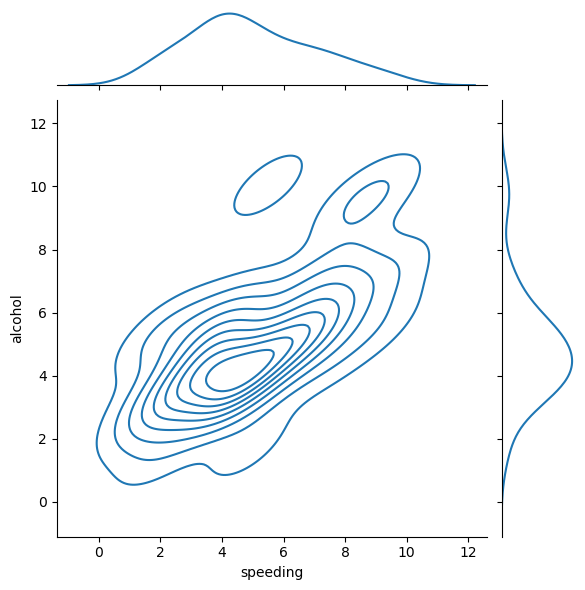

In [26]:
sns.jointplot(x = "speeding", y = "alcohol", data = crash_df, kind = "kde")

### KDE Plot

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

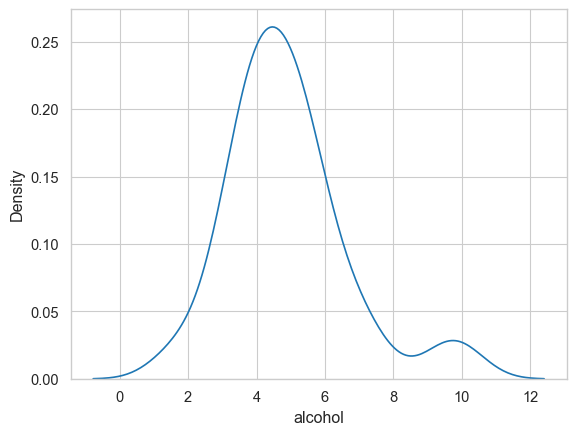

In [61]:
sns.kdeplot(crash_df["alcohol"])

### Pair Plots

In [33]:
tips_df = sns.load_dataset("tips")
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


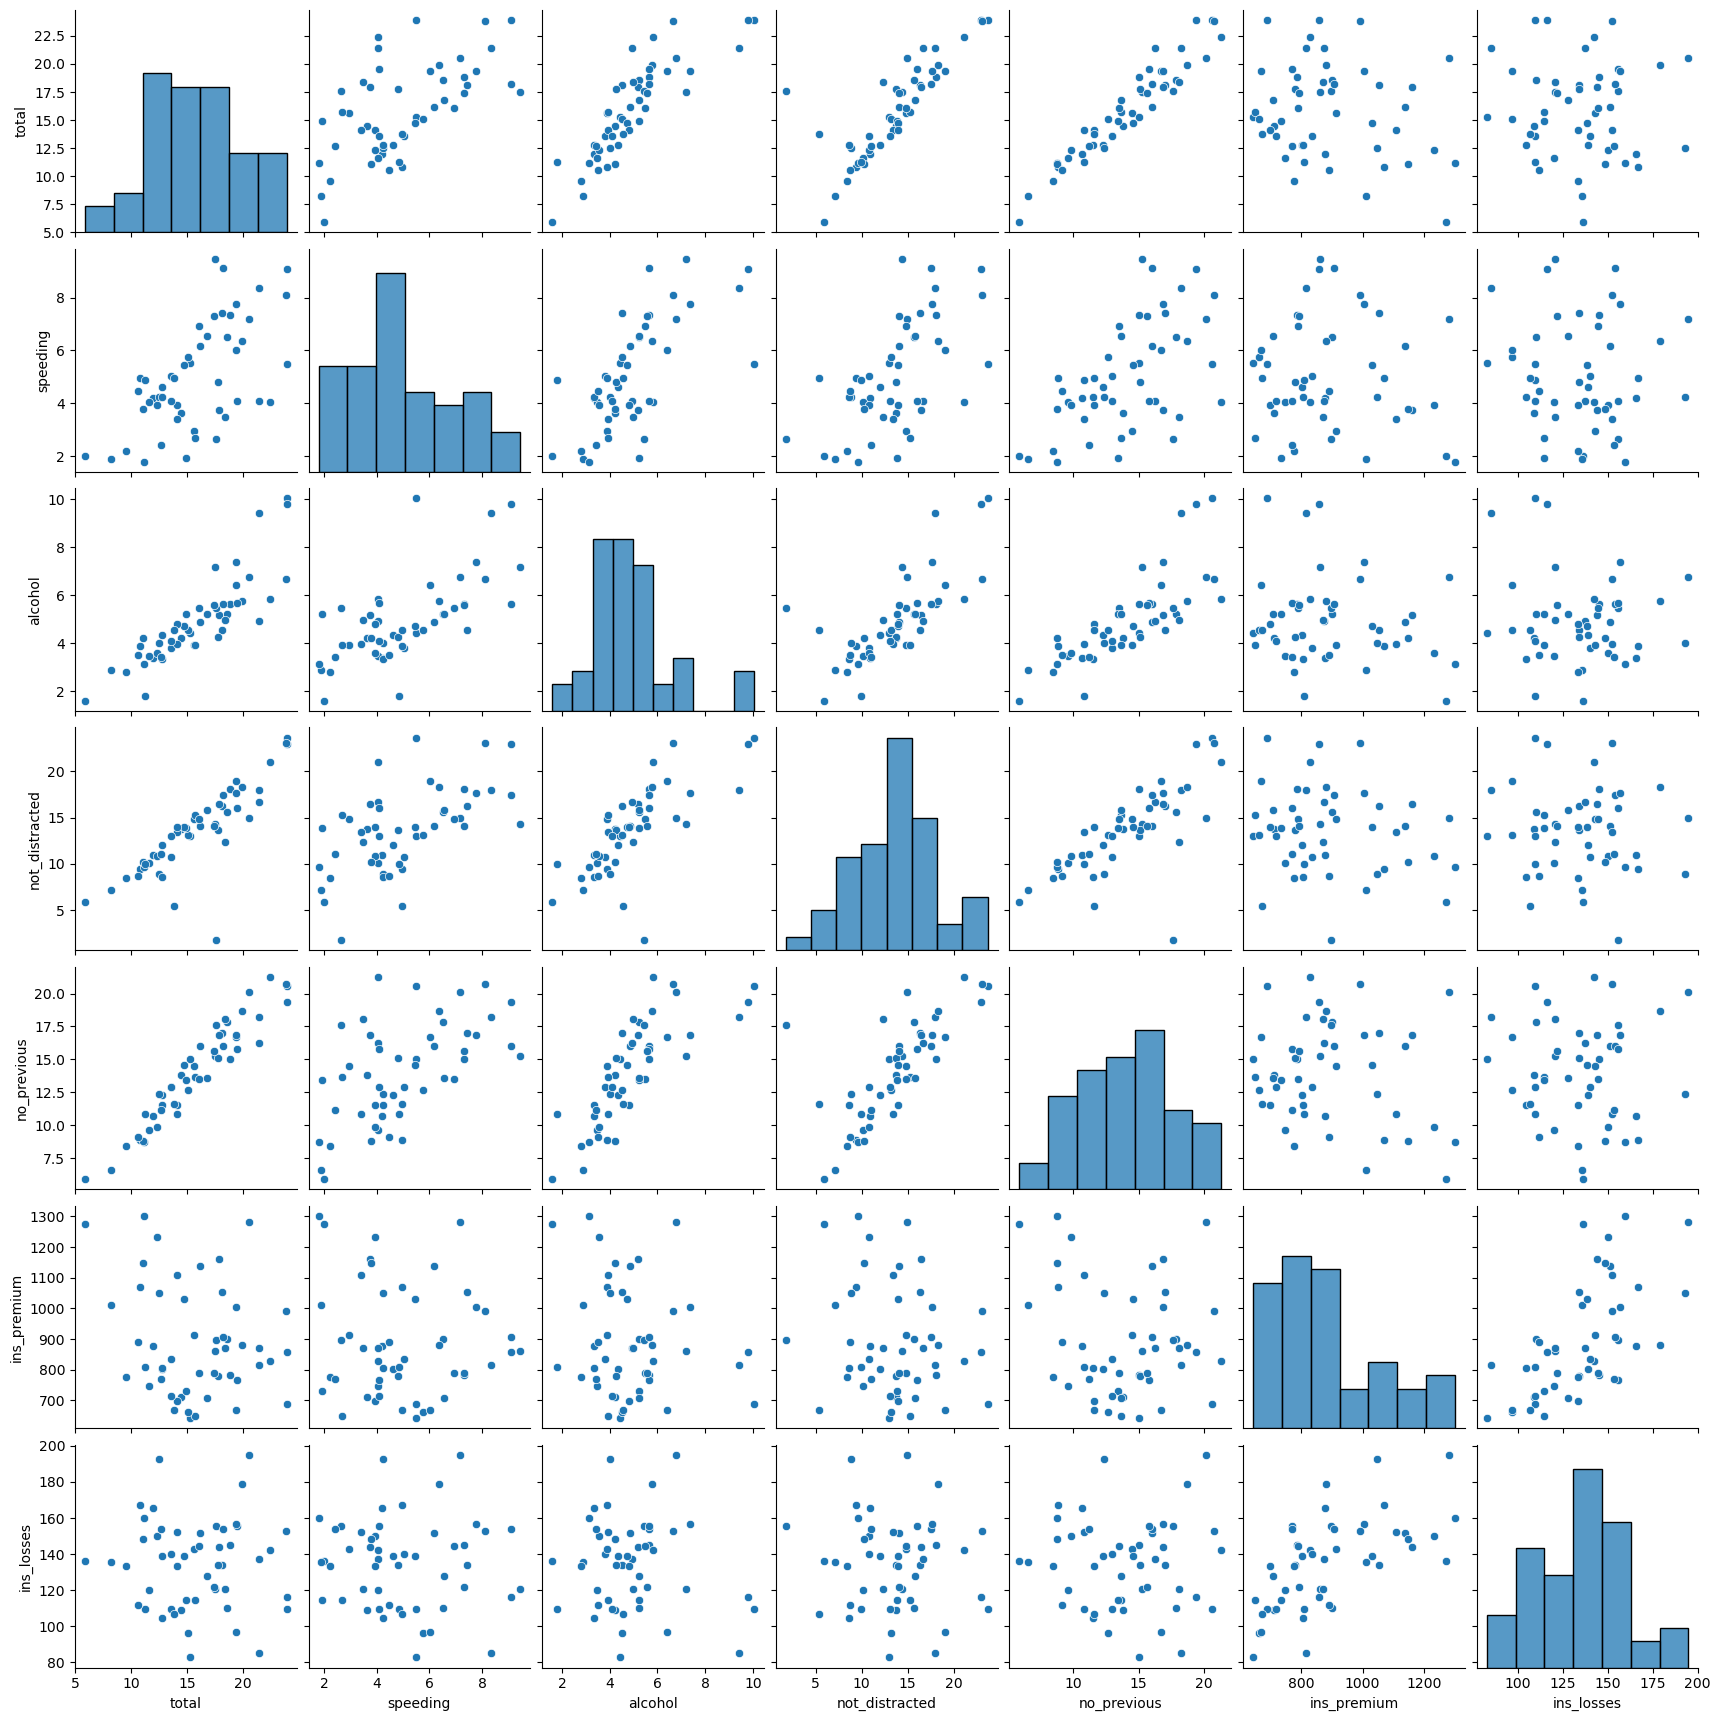

In [30]:
sns.pairplot(crash_df)

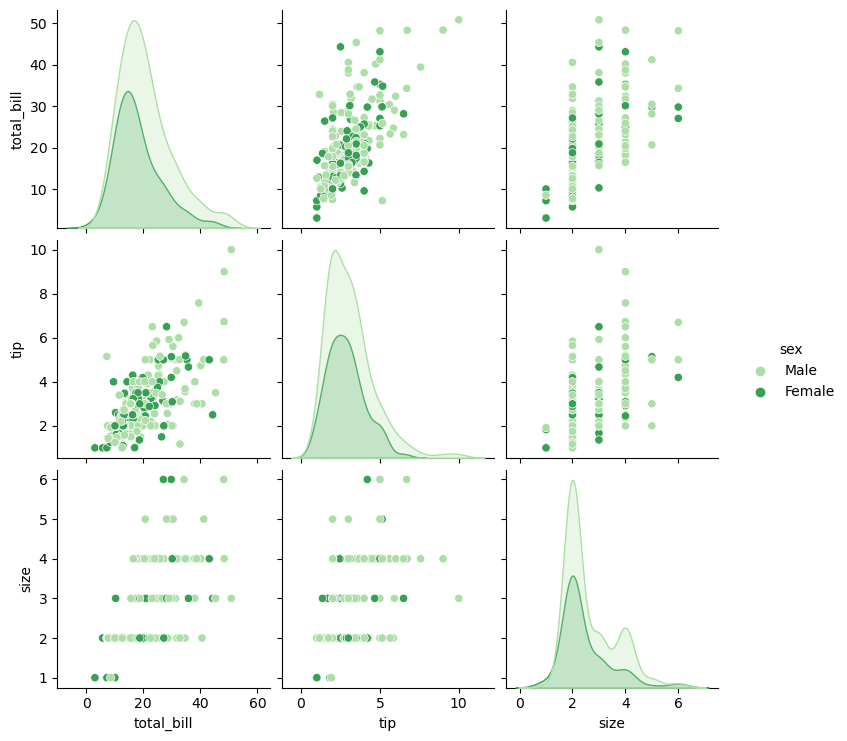

In [38]:
sns.pairplot(tips_df, hue = "sex", palette = "Greens")

### Rub Plot

<AxesSubplot:xlabel='tip'>

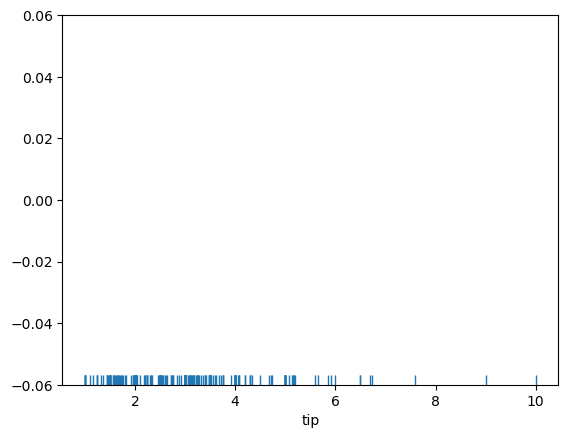

In [39]:
sns.rugplot(tips_df["tip"])

### Styling

<Figure size 800x400 with 0 Axes>

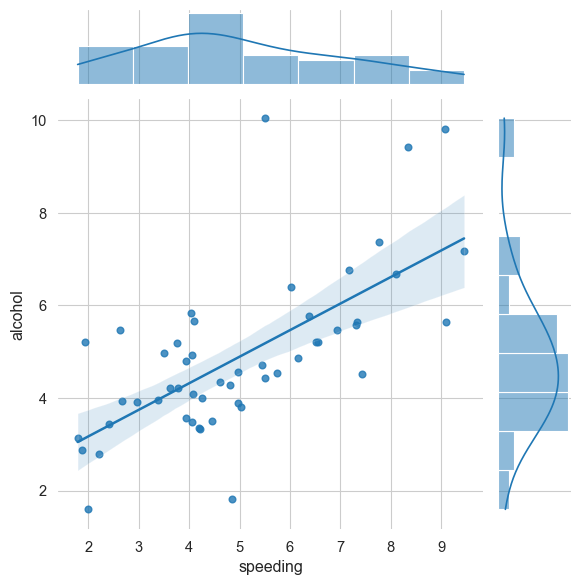

In [60]:
sns.set_style("whitegrid")

plt.figure(figsize = (8,4))

sns.set_context("paper", font_scale = 1.2)

sns.jointplot(x = "speeding", y = "alcohol", data = crash_df, kind = "reg")

sns.despine(left = True, bottom = True)

### Categorical Plots

### Bar Plots

In [64]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


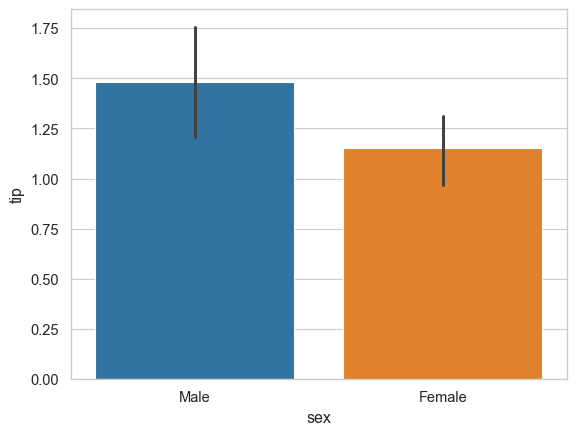

In [77]:
sns.barplot(x = "sex", y = "tip", data = tips_df, estimator = np.std)
plt.show()

### Count Plot

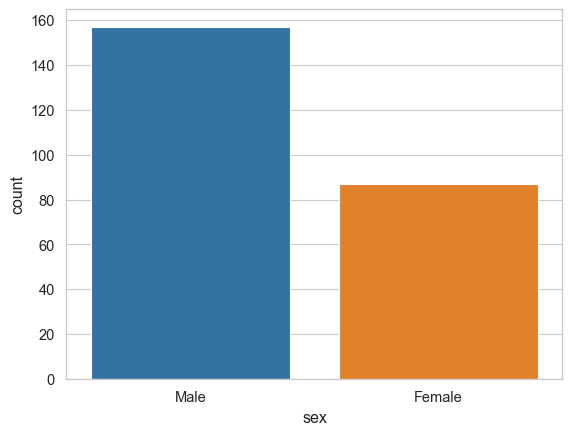

In [87]:
sns.countplot(x="sex", data = tips_df)
plt.show()

### Box Plot

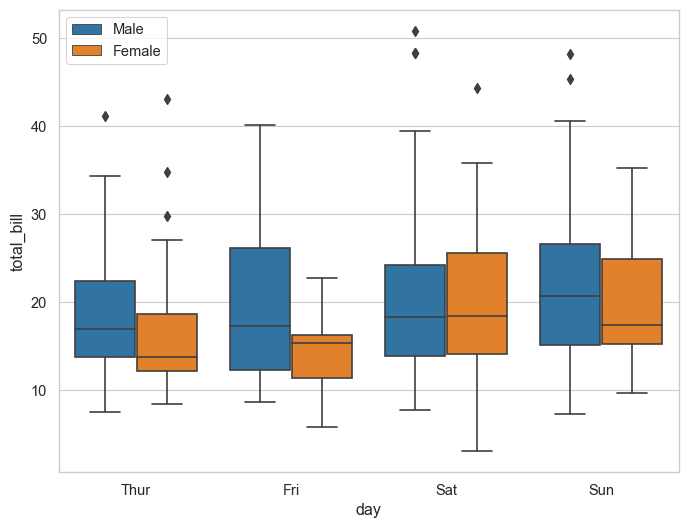

In [92]:
plt.figure(figsize = (8,6))

sns.boxplot(x = "day", y = "total_bill", data = tips_df, hue = "sex")
plt.legend(loc = 0)

plt.show()

### Violin Plot

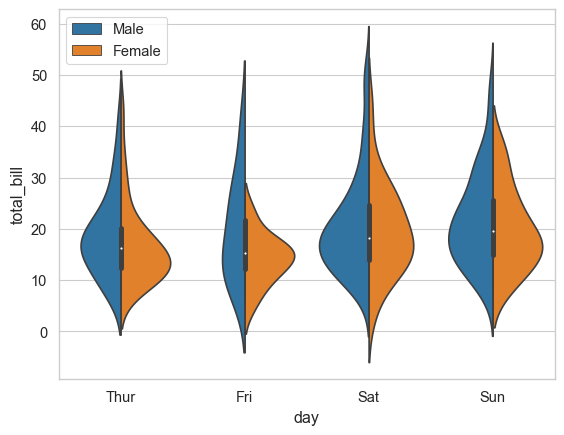

In [100]:
sns.violinplot(
    x = "day", 
    y = "total_bill", 
    data = tips_df, 
    hue = "sex",
    split = True)

plt.legend(loc = 2)

plt.show()

### Srip Plot

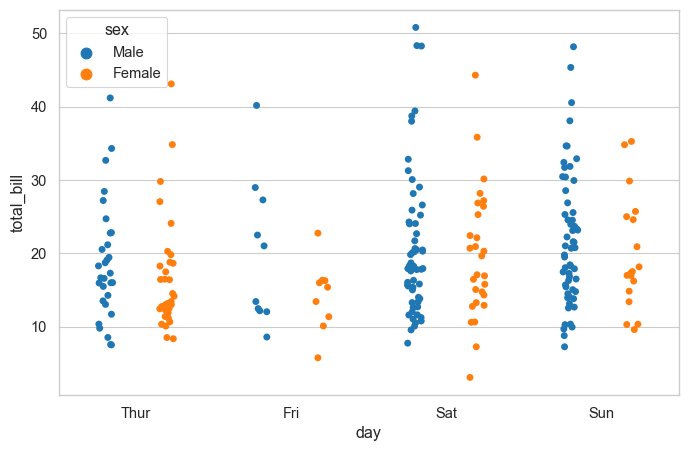

In [113]:
plt.figure(figsize = (8,5))

sns.stripplot(x = "day", 
              y = "total_bill",
             data = tips_df,
             jitter = True,
             hue = "sex",
             dodge = True)

plt.show()

### Swarm Plot

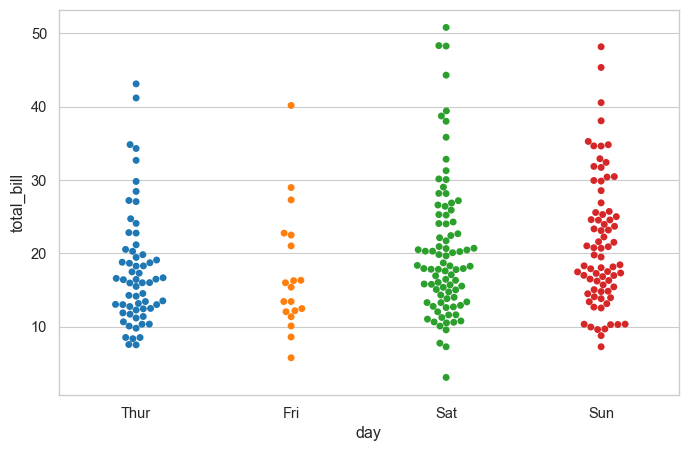

In [119]:
plt.figure(figsize = (8,5))

sns.swarmplot(x = "day",
              y = "total_bill",
              data = tips_df
             )

plt.show()

### Palettes

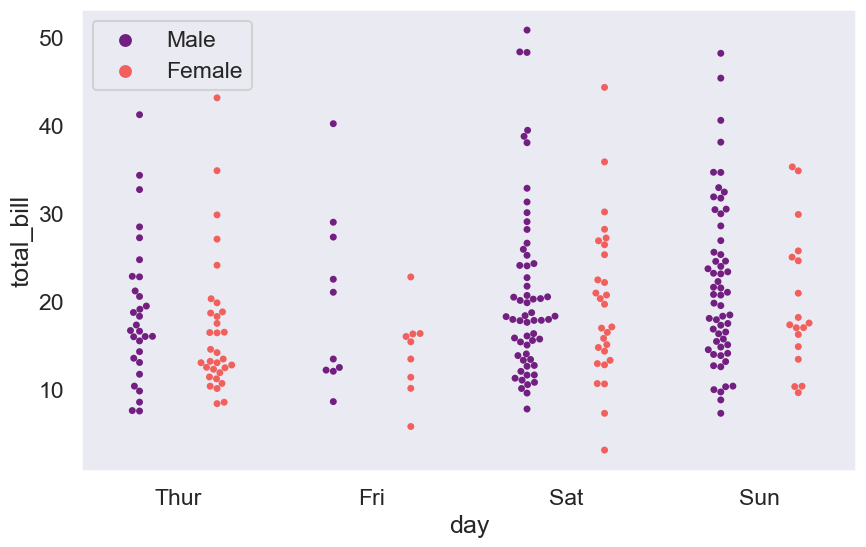

In [154]:
plt.figure(figsize = (10,6))
sns.set_style("dark")
sns.set_context("talk")

sns.swarmplot(x = "day",
              y = "total_bill",
              data = tips_df,
              hue = "sex",
              dodge = True,
              palette = "magma"
             )

plt.legend(loc = 2)

plt.show()

## Matrix Plots

### Heatmaps

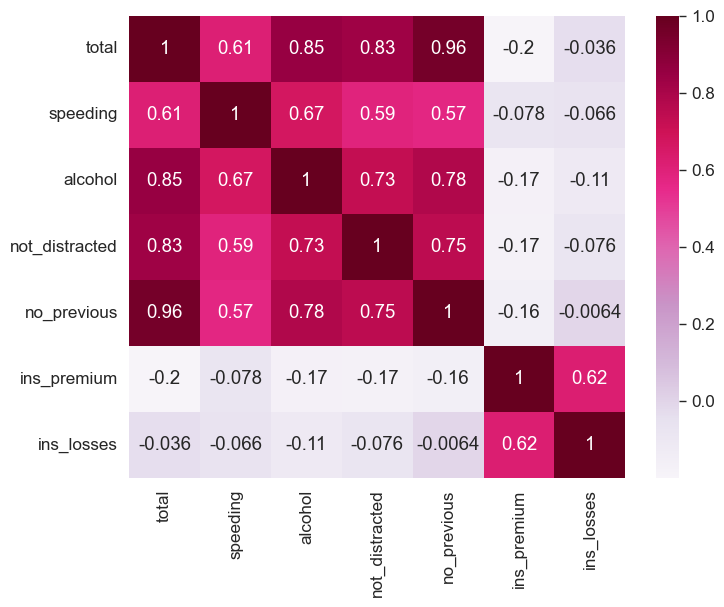

In [160]:
plt.figure(figsize = (8,6))
sns.set_context("paper", font_scale = 1.4)

crash_mx = crash_df.corr()


sns.heatmap(crash_mx, annot = True, cmap = "PuRd")

plt.show()

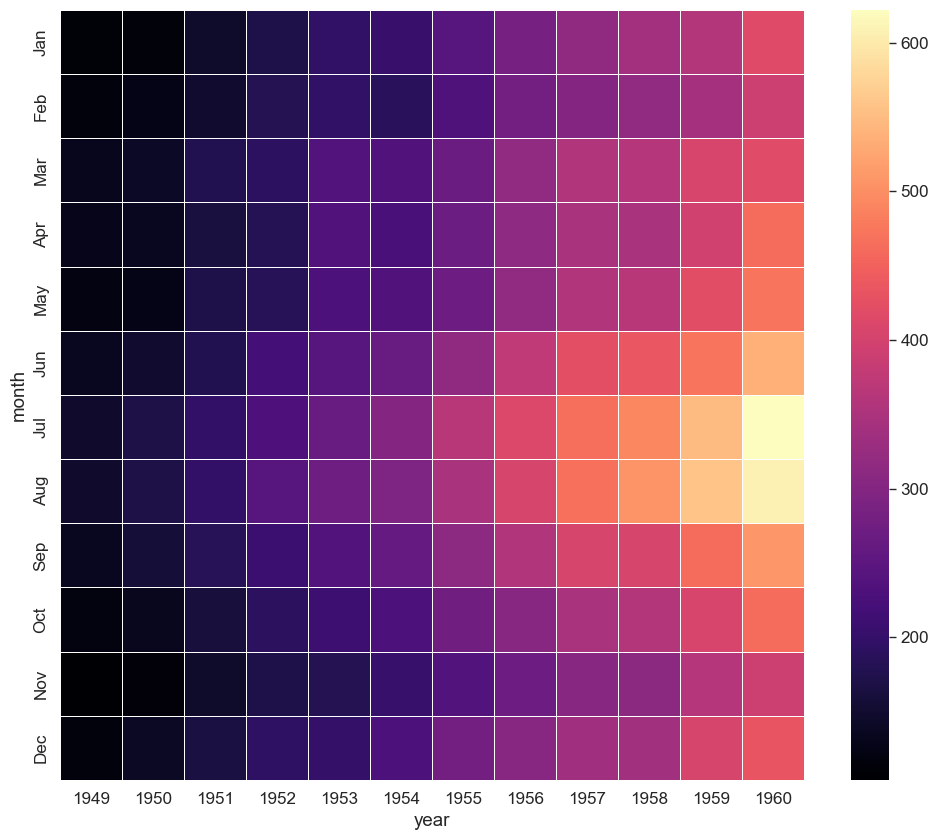

In [183]:
flights = sns.load_dataset("flights")
flights = flights.pivot_table(index = "month", columns = "year", values = "passengers")
# flights
plt.figure(figsize = (12,10))

sns.heatmap(flights,
            cmap = "magma",
            linecolor = "white",
            linewidth = 0.5,
           )

plt.show()

### Cluster Map

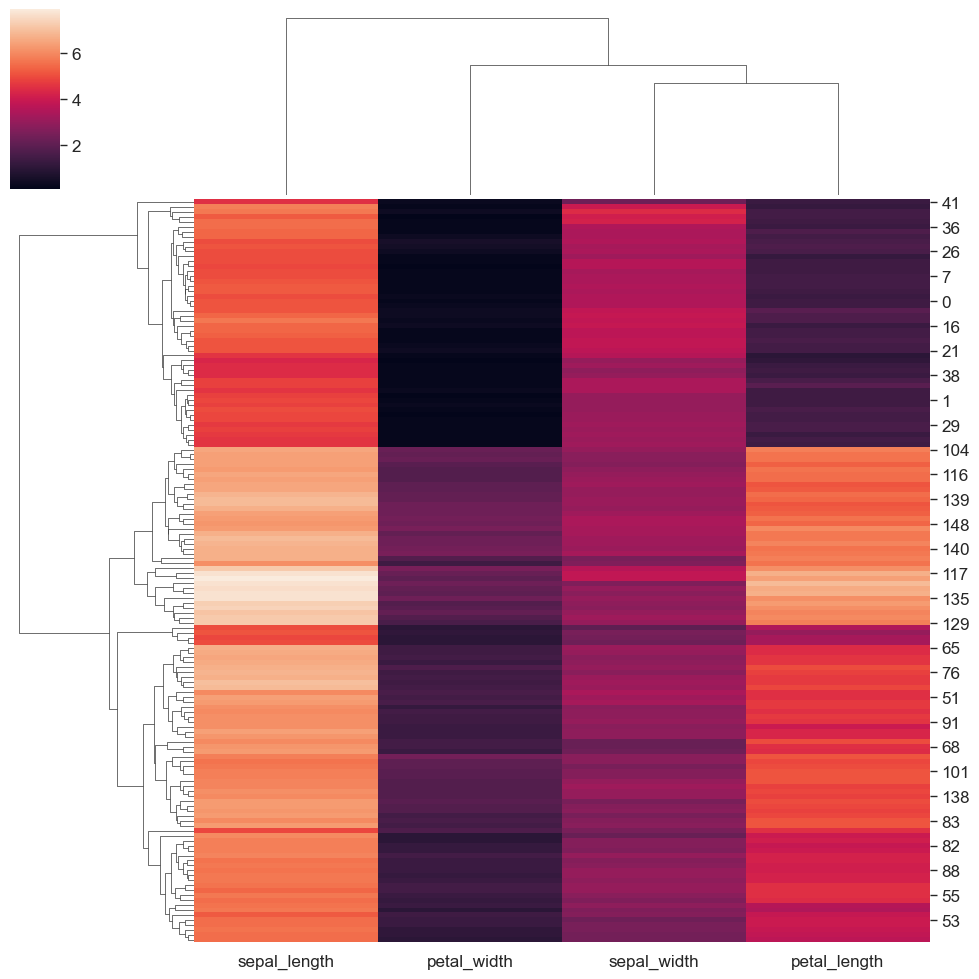

In [191]:
iris = sns.load_dataset("iris")
species = iris.pop("species")
sns.clustermap(iris)

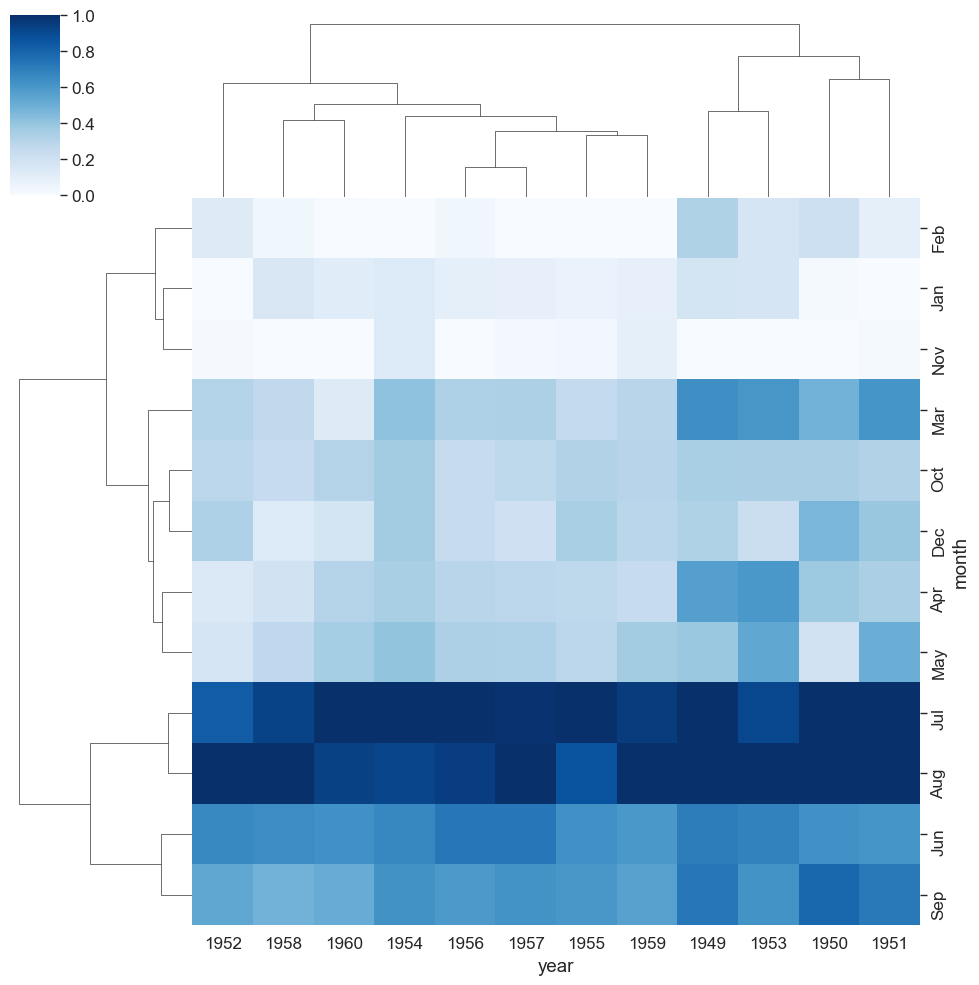

In [194]:
sns.clustermap(flights, cmap = "Blues", standard_scale = 1)
plt.show()

### PairGrid

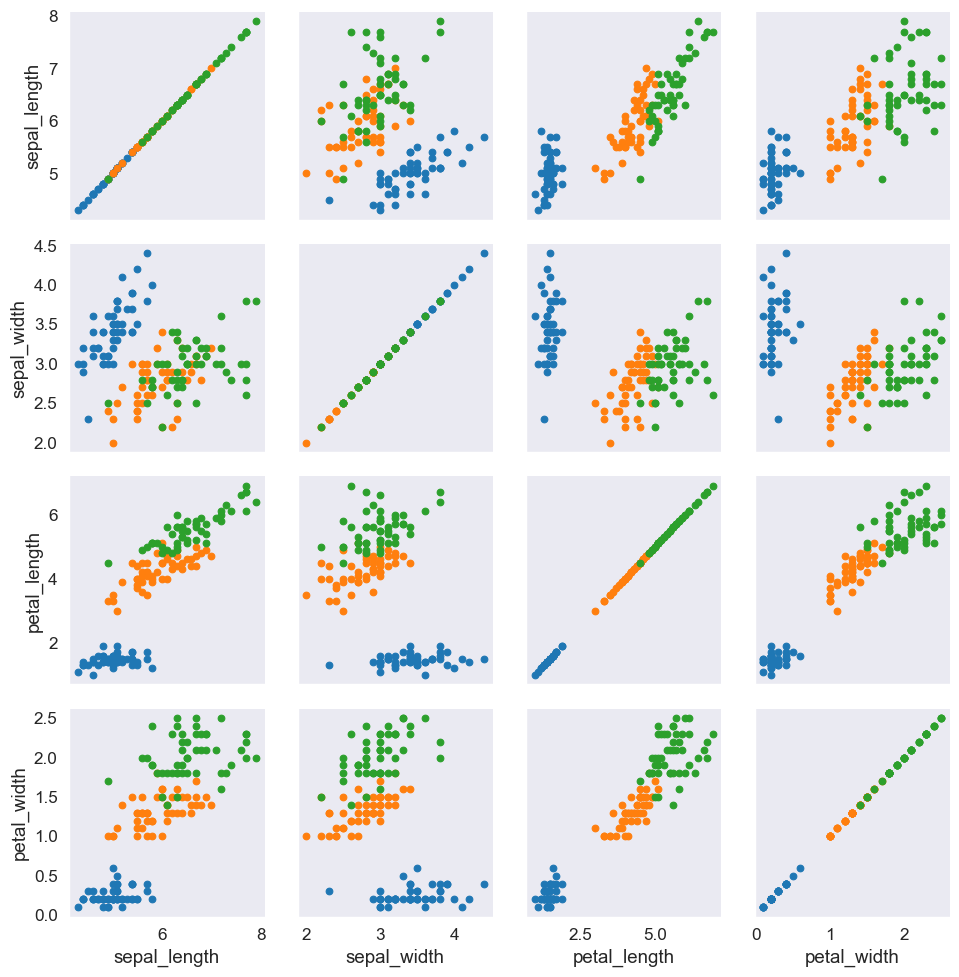

In [197]:
iris = sns.load_dataset("iris")
iris_g = sns.PairGrid(iris, hue = "species")
iris_g.map(plt.scatter)

plt.show()

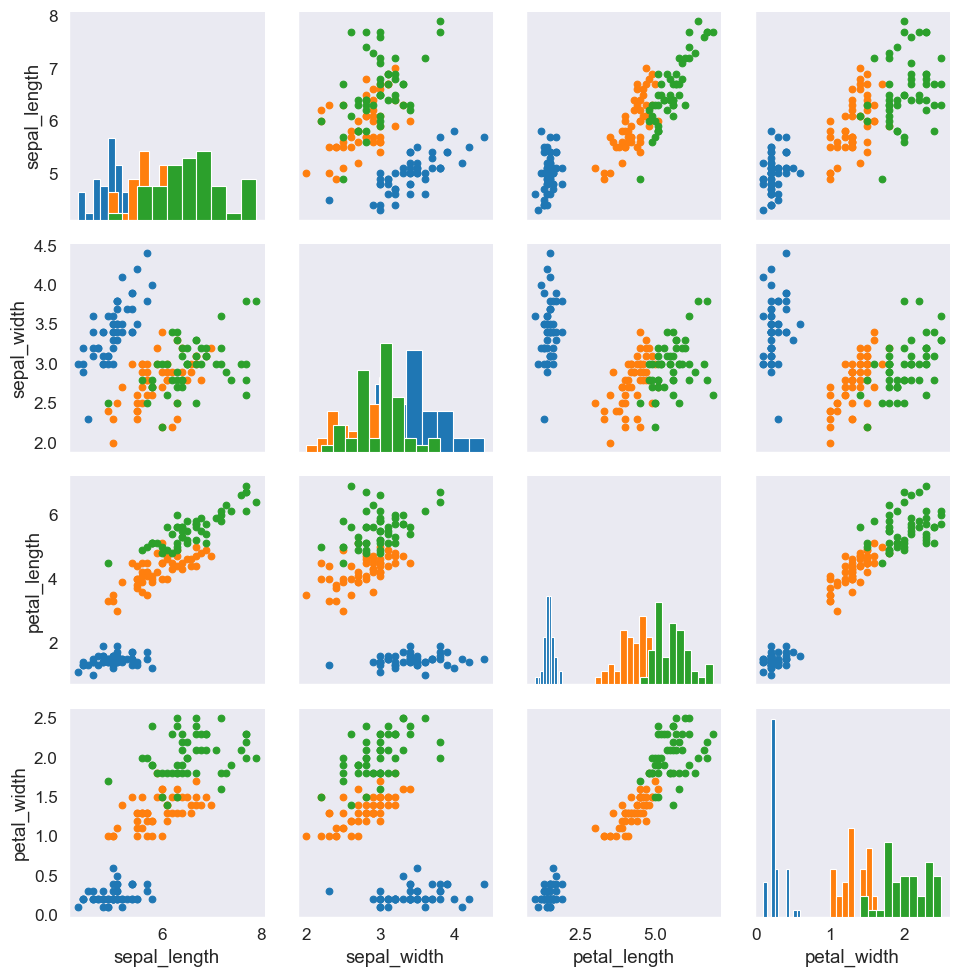

In [199]:
iris = sns.load_dataset("iris")
iris_g = sns.PairGrid(iris, hue = "species")
iris_g.map_diag(plt.hist)
iris_g.map_offdiag(plt.scatter)

plt.show()

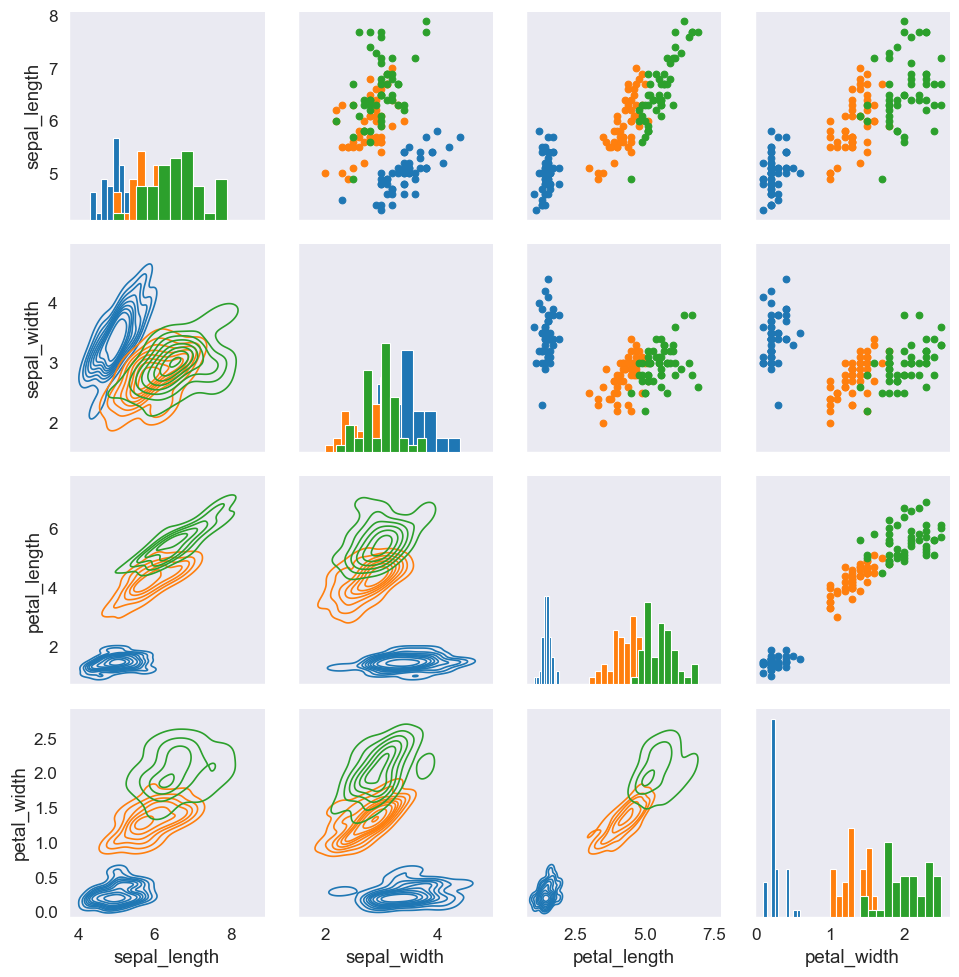

In [206]:
iris = sns.load_dataset("iris")
iris_g = sns.PairGrid(iris, hue = "species")
iris_g.map_diag(plt.hist)
iris_g.map_upper(plt.scatter)
iris_g.map_lower(sns.kdeplot)

plt.show()  

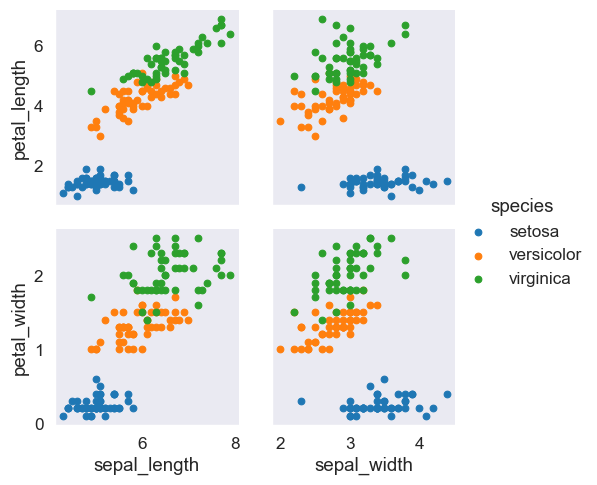

In [214]:
iris = sns.load_dataset("iris")
iris_g = sns.PairGrid(iris, hue = "species",
                     x_vars = ["sepal_length", "sepal_width"],
                     y_vars = ["petal_length", "petal_width"])
iris_g.map(plt.scatter)
iris_g.add_legend()

plt.show()

### Facet Grid

In [223]:
tips_df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


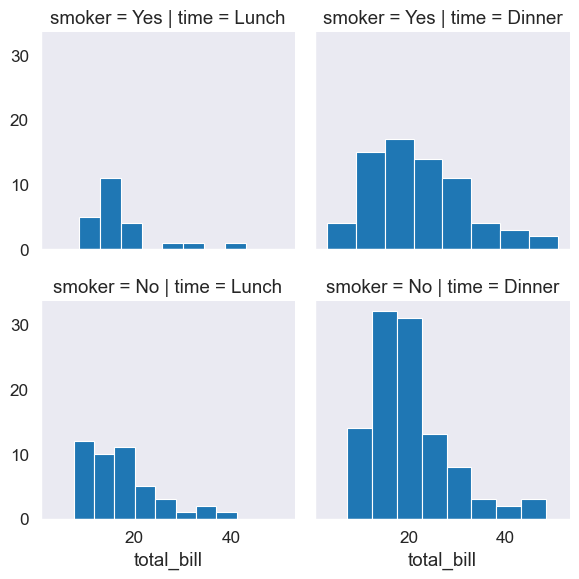

In [222]:
sns.set_style(style = "dark")

tips_fg = sns.FacetGrid(tips_df,
                        col = "time",
                        row = "smoker"
                       )

tips_fg.map(plt.hist, "total_bill", bins = 8)

plt.show()

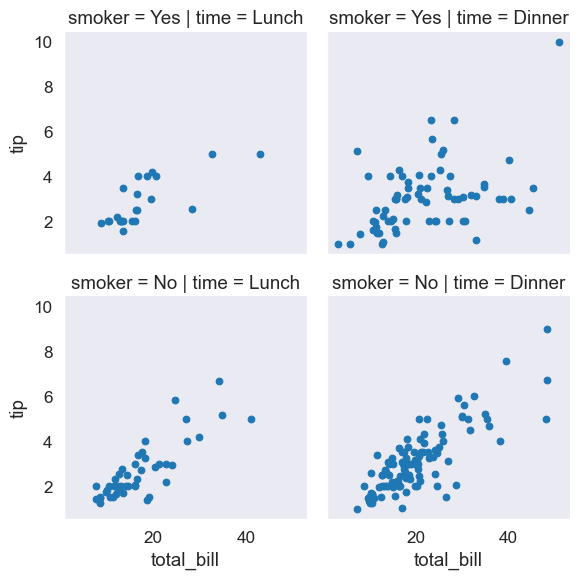

In [230]:
sns.set_style(style = "dark")

tips_fg = sns.FacetGrid(tips_df,
                        col = "time",
                        row = "smoker"
                       )

tips_fg.map(plt.scatter, "total_bill", "tip")

plt.show()

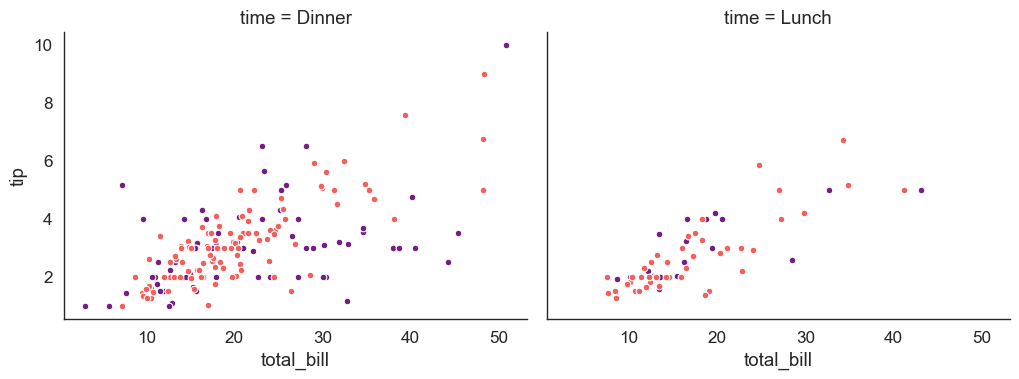

In [241]:
sns.set_style(style = "white")

tips_fg = sns.FacetGrid(tips_df,
                        col = "time",
                        hue = "smoker",
                        height = 4,
                        aspect = 1.3,
                        col_order = ["Dinner", "Lunch"],
                        palette = "magma"
                       )

tips_fg.map(plt.scatter, "total_bill", "tip", edgecolor = "white")

plt.show() 

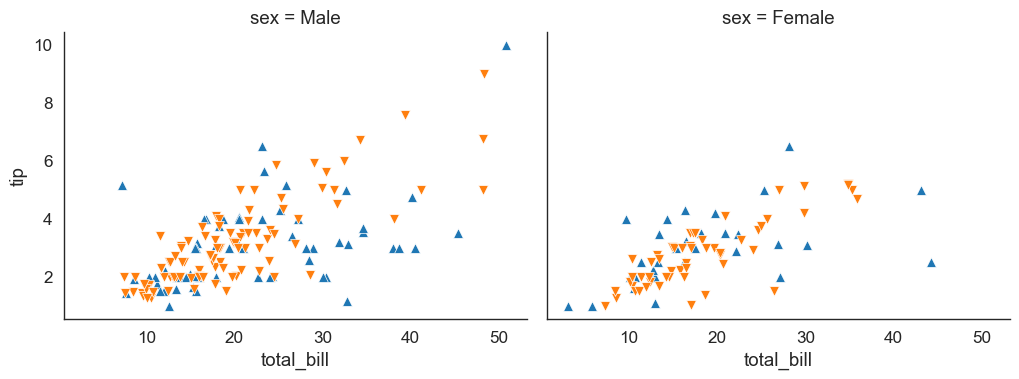

In [243]:
kws = dict(s=50, linewidth = 0.5, edgecolor = "w")
tips_fg = sns.FacetGrid(tips_df,
                        col = "sex",
                        hue = "smoker",
                        height = 4,
                        aspect = 1.3,
                        hue_order = ["Yes", "No"],
                        hue_kws = dict(marker = ["^","v"])
                       )

tips_fg.map(plt.scatter, "total_bill", "tip", **kws)

plt.show()

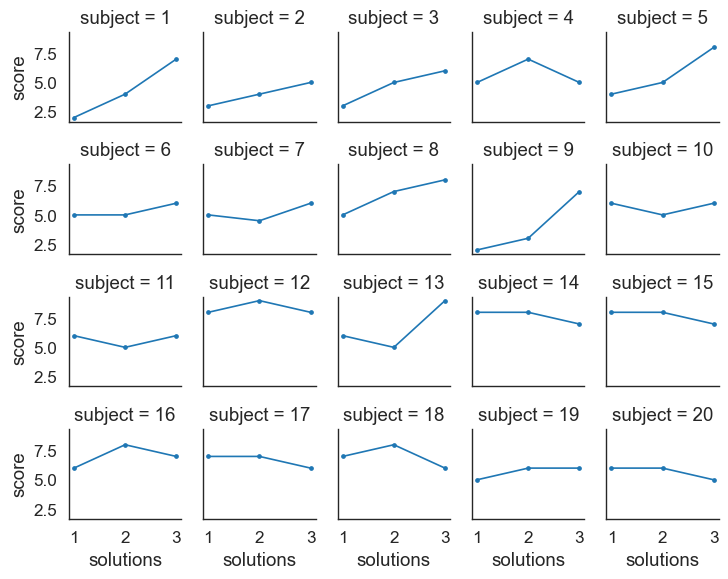

In [252]:
att_df = sns.load_dataset("attention")
att_fg = sns.FacetGrid(att_df,
                        col = "subject",
                        col_wrap = 5,
                        height = 1.5
                       )

att_fg.map(plt.plot, "solutions", "score", marker = '.')

plt.show()

### Regression Plots

In [253]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Figure size 1000x800 with 0 Axes>

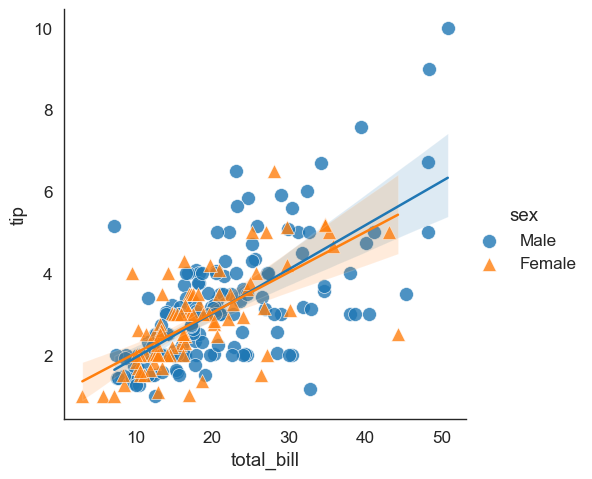

In [257]:
plt.figure(figsize = (10,8))
sns.set_context("paper", font_scale = 1.4)
sns.lmplot(x = "total_bill", 
           y = "tip",
           hue = "sex",
           data = tips_df,
           markers = ["o","^"],
           scatter_kws = {"s": 100,
                          "linewidth": 0.5,
                          "edgecolor": "w"
                         }
          )

plt.show()

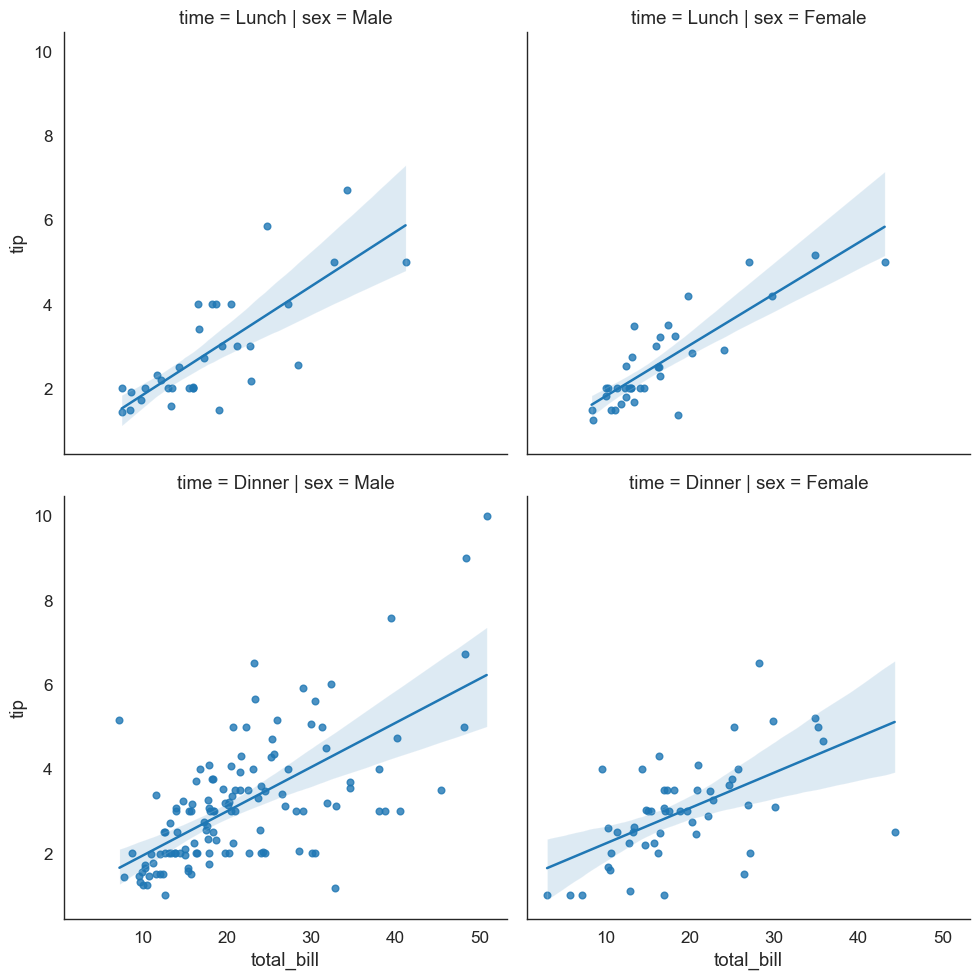

In [264]:
fig = sns.lmplot(x = "total_bill",
           y = "tip",
           col = "sex",
           row = "time",
           data = tips_df
          )

fig